In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('historical/Cause_of_Death_Timeline_data (1).csv', parse_dates=True)
# df = pd.read_csv('historical/syria.export.full.csv', sep='\t')

/Users/amangum/anaconda/envs/datasci/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.dropna(subset=['Date'], inplace=True)
df['epoch'] = df.Date.astype(int) // 10**9

In [5]:
df.Date.max() - df.Date.min()

Timedelta('895 days 00:00:00')

In [6]:
# creates 10 day bins
df['binned_epoch'] = pd.cut(df.epoch, 88)

In [7]:
df['binned_epoch_codes'] = df.binned_epoch.cat.codes

In [8]:
def half_dates(x):
    # creates weekly date times while retaining date information unlike binning
    m = x.month
    y = x.year
#     d = 15 if x.day > 14 else 1
    if x.day > 21:
        d = 21
    elif x.day > 14:
        d = 14
    elif x.day > 7:
        d = 7
    else:
        d = 1
    return pd.datetime(y, m, d)
    
df['Deaths per Week'] = df.Date.apply(half_dates)

In [9]:
df.dtypes

﻿Admin3AR                     object
Admin3EN                      object
Admin3ID                      object
Age                          float64
ArmyDefector                 float64
BirthGovernateAR              object
Child                         object
CauseOfDeath                  object
CommentLen                   float64
Comment                       object
Date                  datetime64[ns]
DeathDescAR                   object
DeathDescEn                   object
GenderAR                      object
Gender                        object
GovernateAR                   object
GovernateEN                   object
GovernateID                  float64
ID                           float64
Last30                       float64
Last60                       float64
Last90                       float64
Lat                          float64
Location                      object
Lon                          float64
MonthDate                     object
Name                          object
N

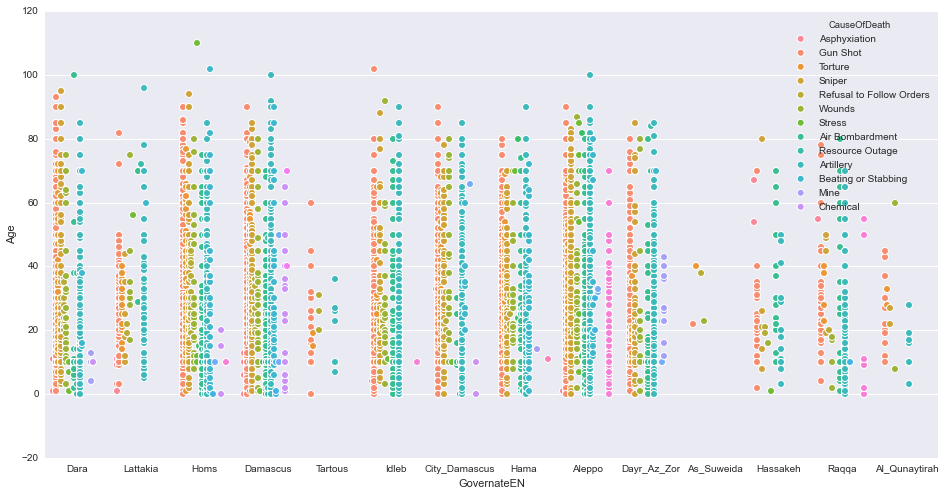

In [399]:
plt.figure(figsize=(16,8))
sns.stripplot(x='GovernateEN', y='Age', data=df[df.Age != -1], hue='CauseOfDeath')
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)

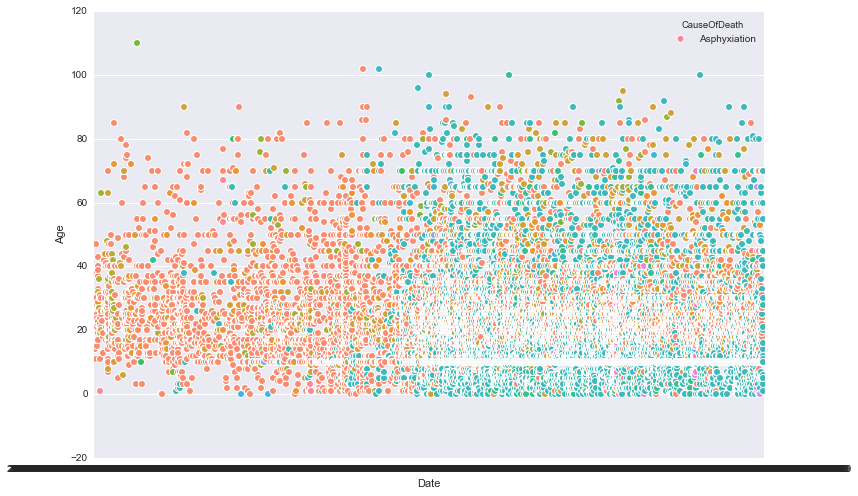

In [400]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Date', y='Age', data=df[df.Age != -1], hue='CauseOfDeath')
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)


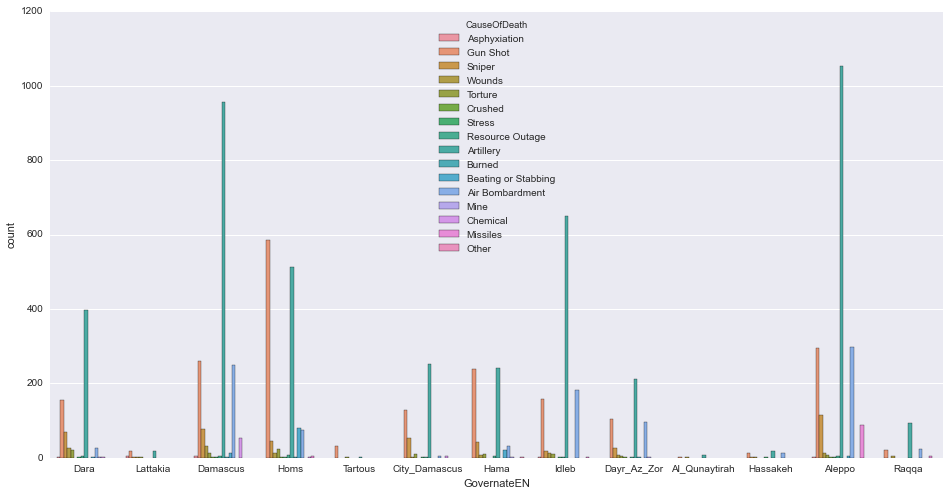

In [177]:
plt.figure(figsize=(16,8))
sns.countplot(x='GovernateEN', data=df[(df.Child == True) & (df.CauseOfDeath != 'Unspecified')][['GovernateEN', 'CauseOfDeath']].dropna(), hue='CauseOfDeath')

In [36]:
acts_of_war = df[df.CauseOfDeath.isin(['Gun Shot', 'Artillery', 'Air Bombardment', 'Sniper', 'Torture', 'Chemical', 'Refusal to Follow Orders', 'Beating or Stabbing', 'Missiles'])]
targeted_acts = df[df.CauseOfDeath.isin(['Gun Shot', 'Sniper', 'Torture', 'Refusal to Follow Orders', 'Beating or Stabbing'])]
untargeted_acts = acts_of_war = df[df.CauseOfDeath.isin(['Artillery', 'Air Bombardment', 'Chemical', 'Missiles'])]

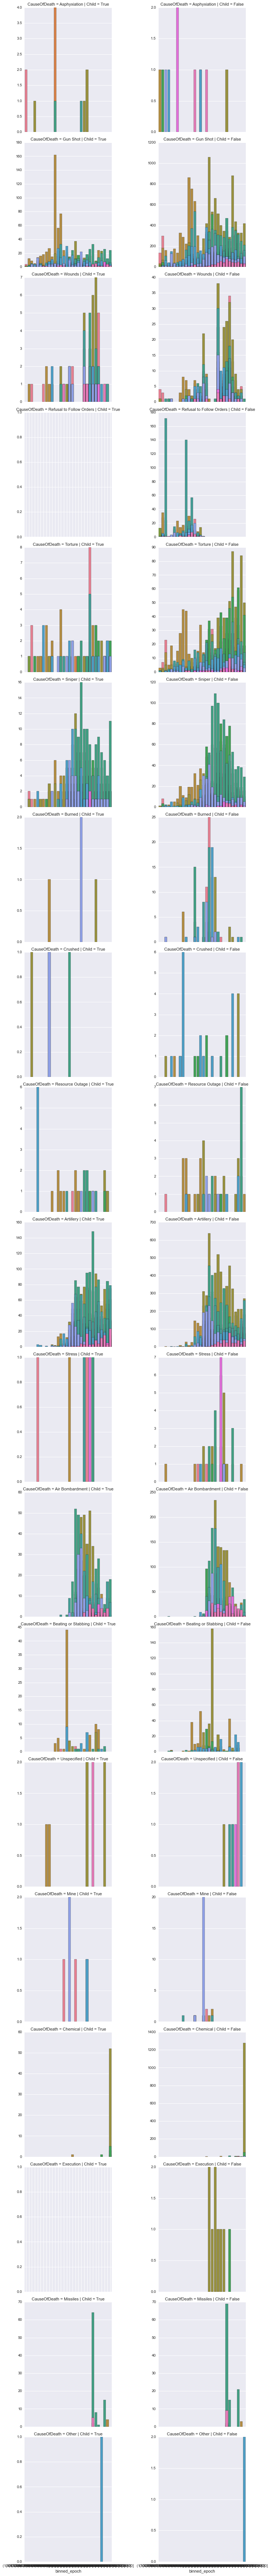

In [58]:
# plt.figure(figsize=(16,8))
g = sns.FacetGrid(df[['binned_epoch', 'CauseOfDeath', 'Child', 'GovernateEN']].dropna(), legend_out=False, hue='GovernateEN', col="Child", row="CauseOfDeath", size=5, sharey=False)
g = g.map(sns.countplot, "binned_epoch")
# sns.countplot(x='binned_epoch', data=df[df.Child == False][['binned_epoch', 'CauseOfDeath']].dropna(), hue='CauseOfDeath')

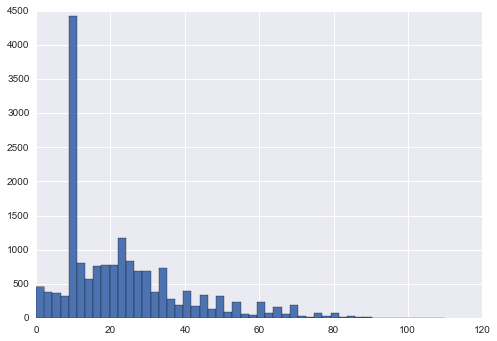

In [47]:
df[df.Age != -1].Age.hist(bins=50)

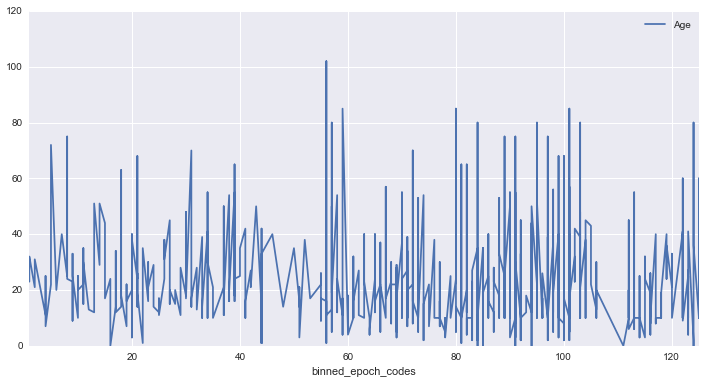

In [408]:
df[df.Age != -1].dropna().plot('binned_epoch_codes', 'Age', figsize=(12,6))

In [11]:
g = df.groupby(['Deaths per Week', 'CauseOfDeath'])[['CauseOfDeath']].count()
g.columns = ['count']
g = g.unstack()['count']

In [12]:
g.fillna(0, inplace=True)

In [13]:
g['total'] = g.apply(np.sum, axis=1)

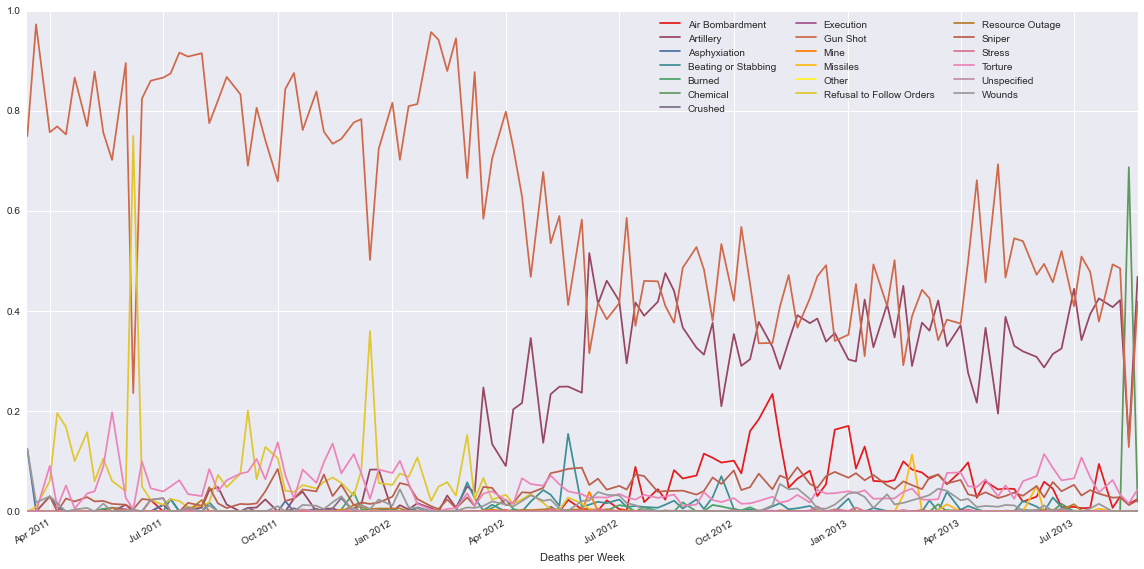

In [14]:
normalized = g.apply(lambda x: x / x.total, axis=1).drop('total', axis=1)

sns.set_style("darkgrid")
normalized.plot(kind='line', figsize=(16,8), colormap='Set1')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1), ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('cause_of_death_weekly_trends')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1e8f63bd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1e0f19c90>], dtype=object)

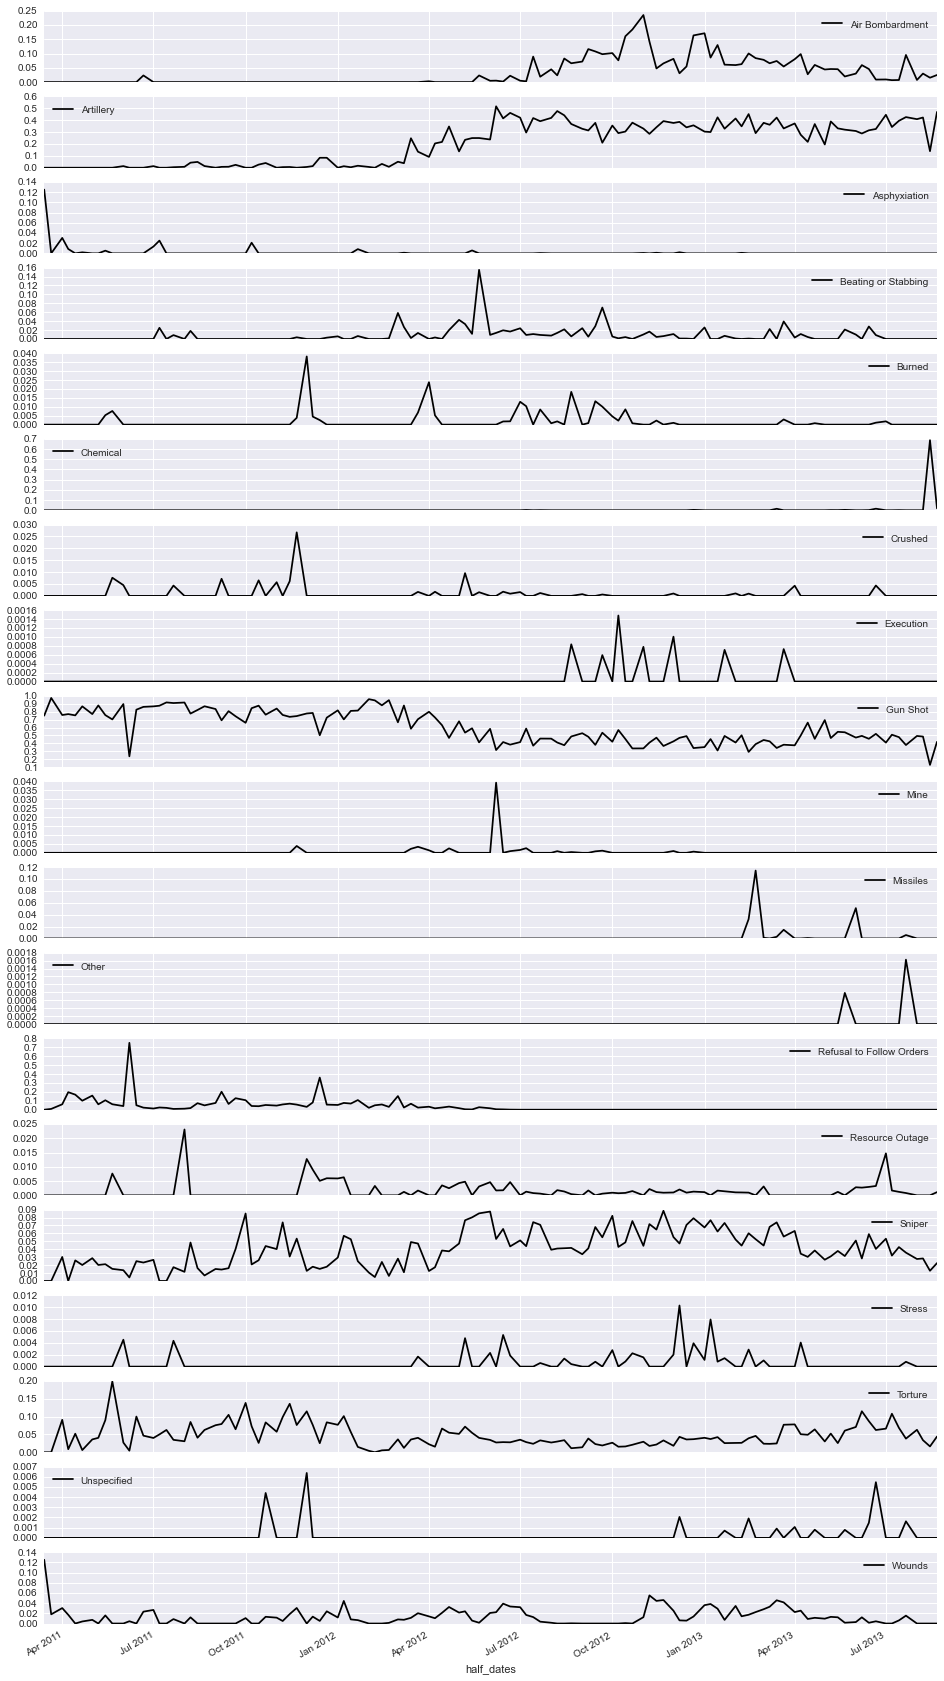

In [480]:
normalized.plot(kind='line', subplots=True, figsize=(16,32), colormap='Set1')


In [473]:
normalized.to_csv('weekly.tsv', sep='\t')